Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Olga Kireeva"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [38]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        res = 0
        for i in range(len(self.yk)):
            v = 1
            for j in range(len(self.xk)):
                if j != i:
                    v = v * (x - self.xk[j]) / (self.xk[i] - self.xk[j])
            res += v * self.yk[i]
        return res

In [39]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


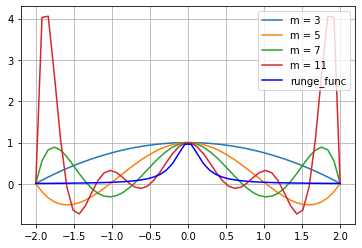

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xx_2 = np.linspace(-2, 2, 50)
for m in [3, 5, 7, 11]:
    xx_1 = np.linspace(-2, 2, m)
    yy_1 = runge_func(xx_1)
    lagr = LagrangeInterpolator(xx_1, yy_1)
    yy_2 = [lagr(xval) for xval in xx_2]
    ax.plot(xx_2, yy_2, '-', label='m = %s' % m)

ax.plot(xx_2, runge_func(xx_2), color='b', label='runge_func')
plt.legend(loc = 'upper right')
plt.grid()

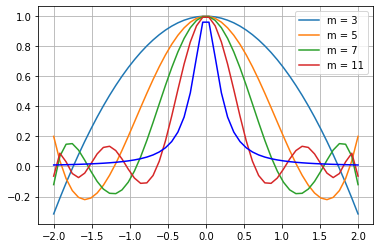

In [41]:
def nodes(n):
    k = np.arange(n)
    return np.cos((2 * k + 1) * np.pi / (2 * n))

fig1, ax1 = plt.subplots()
for m in [3, 5, 7, 11]:
    xx_3 = 2 * nodes(m)
    yy_3 = runge_func(xx_3)
    lagr = LagrangeInterpolator(xx_3, yy_3)
    yy_2 = [lagr(xval) for xval in xx_2]
    ax1.plot(xx_2, yy_2, '-', label='m = %s' % m)

ax1.plot(xx_2, runge_func(xx_2), color='b')
plt.legend(loc='upper right')
plt.grid()